# Set Up

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [2]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from numpy import isnan
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import sem
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from collections import Counter
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import shap 
from imblearn.over_sampling import SMOTEN
import copy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
s5_cfile = '/content/drive/My Drive/MCS5_Age11_CM_Interviews.csv'
s6_cfile = '/content/drive/My Drive/MCS6_Age14_CM_Interviews.csv'
s7_cfile = '/content/drive/My Drive/MCS7_Age17_CM_Interviews.csv'

s5_pfile = '/content/drive/My Drive/MCS5_Age11_Parent_CM.csv'
s6_pfile = '/content/drive/My Drive/MCS6_Age14_Parent_CM.csv'
s7_pfile = '/content/drive/My Drive/MCS7_Age17_Parent_CM.csv'

s5_tfile = '/content/drive/My Drive/MCS5_Age11_Teacher_Survey.csv'
s7_qfile = '/content/drive/My Drive/MCS7_Age17_CM_Qualifications.csv'

In [6]:
s5_cm = pd.read_csv(s5_cfile)
s6_cm = pd.read_csv(s6_cfile)
s7_cm = pd.read_csv(s7_cfile)

s5_pcm = pd.read_csv(s5_pfile)
s6_pcm = pd.read_csv(s6_pfile)
s7_pcm = pd.read_csv(s7_pfile)

s5_tcm = pd.read_csv(s5_tfile)
s7_qcm = pd.read_csv(s7_qfile)

#Cleaning the Datasets

Creating Cohort and Person ID's to merge dataframes on and ensure continuity 

In [7]:
s5_cm["Cohort_ID"] = s5_cm["MCSID"] + s5_cm["ECNUM00"].astype(str)
s6_cm["Cohort_ID"] = s6_cm["MCSID"] + s6_cm["FCNUM00"].astype(str)
s7_cm["Cohort_ID"] = s7_cm["MCSID"] + s7_cm["GCNUM00"].astype(str)
s5_cm["Merge_ID"] = s5_cm["MCSID"] + s5_cm["ECNUM00"].astype(str)
s6_cm["Merge_ID"] = s6_cm["MCSID"] + s6_cm["FCNUM00"].astype(str)
s7_cm["Merge_ID"] = s7_cm["MCSID"] + s7_cm["GCNUM00"].astype(str)

s5_pcm["Person_ID"] = s5_pcm["MCSID"] + s5_pcm["EPNUM00"].astype(str)
s6_pcm["Person_ID"] = s6_pcm["MCSID"] + s6_pcm["FPNUM00"].astype(str)
s7_pcm["Person_ID"] = s7_pcm["MCSID"] + s7_pcm["GPNUM00"].astype(str)
s5_pcm["Cohort_ID"] = s5_pcm["MCSID"] + s5_pcm["ECNUM00"].astype(str)
s6_pcm["Cohort_ID"] = s6_pcm["MCSID"] + s6_pcm["FCNUM00"].astype(str)
s7_pcm["Cohort_ID"] = s7_pcm["MCSID"] + s7_pcm["GCNUM00"].astype(str)

s5_tcm["Merge_ID"] = s5_tcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)
s5_tcm["Cohort_ID"] = s5_tcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)

s7_qcm["Cohort_ID"] = s7_qcm["MCSID"] + s7_qcm["GCNUM00"].astype(str)
s7_qcm["Merge_ID"] = s7_qcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)

Renaming the columns to make them easier tor read

In [8]:
#Renaming all the variables for each of the tables, making it easier to read the datasets
s5_cm.columns = ['s5_MCSID', 's5_CNUM', 's5_Like_School', 's5_Like_English', 's5_Like_Welsh', 's5_Like_Maths', 's5_Like_Science', 's5_Like_PE', "s5_Try_School", 's5_School_Interesting', 's5_Unhappy_School', 's5_Tired_School', 's5_School_Waste', 
                  's5_Misbehave_School', 's5_Parents_Interested_School', 's5_Teacher_Discipline', 's5_Missed_School', 's5_Good_English', 's5_Good_Maths', 's5_Good_Welsh', 's5_Good_Science', 's5_Excited_For_SecondSchool', 
                  's5_Care_School_Achievement', 's5_Stay_School_Age16', 'Cohort_ID', "Merge_ID"]
s6_cm.columns = ['s6_MCSID', 's6_CNUM', 's6_sex', 's6_Good_English', 's6_Good_Welsh', 's6_Good_Maths', 's6_Good_Science', 's6_Good_PE', 's6_Parents_Subject', 's6_Teachers_Subjects', 's6_Yourself_Subjects',
                 's6_Someone_Subjects', 's6_Time_Homework', 's6_Help_Homework', "s6_Try_School", 's6_School_Interesting', 's6_Unhappy_School', 's6_Tired_School', 's6_School_Waste', 
                 's6_Keep_Mind_School', 's6_Misbehave_Lessons', 's6_Missed_School_No_ParenetalPermission', 's6_Missed_School_NoPermission', 's6_Stay_Education', 's6_Reasons_Leaving_Educ',
                 's6_Likelihood_University', 's6_Happy_School_Work', 's6_Happy_School', 'Cohort_ID', "Merge_ID"]
s7_cm.columns = ['s7_MCSID', 's7_CNUM', 's7_Attending_School', 's7_Part_Full_Time', 's7_Apprenticeship', 's7_Traineeship', 's7_SDQ1', 's7_SDQ2', "s7_SDQ3", 's7_SDQ4', 's7_SDQ5', 's7_SDQ6', 's7_SDQ7', 's7_SDQ8', 's7_SDQ9', 's7_SDQ10', 's7_SDQ11', 's7_SDQ12', 
                 's7_SDQ13', 's7_SDQ14', 's7_SDQ15', 's7_SDQ16', 's7_SDQ17', 's7_SDQ18', 's7_SDQ19', 's7_SDQ20', 's7_SDQ21', 's7_SDQ22', 's7_SDQ23', 's7_SDQ24', 's7_SDQ25', 's7_K6_Depressed', 's7_K6_Hopeless', 's7_K6_Fidgety', 's7_K6_Effort', 's7_K6_Worthless',
                 's7_K6_Nervous', 's7_Diagnosed_Depression_Anxiety', 's7_Age_Diagnosis', 's7_Currently_Treated', 's7_Ever_Treated', 's7_Attempted_Suicide', 's7_University', 's7_Likelihood_University', 's7_Reasons_Attending_Uni',
                 's7_Reasons_Not_Attending_Uni', 's7_Currently_Doing', 's7_Where_Studying_Training', 's7_Num_Edu_Establishments_Attended', 'Cohort_ID', "Merge_ID"]

s5_pcm.columns = ['s5_MCSID', 's5_PNum', 's5_Elig', 's5_CNum', 's5_Same_Mixed_Sex', 's5_Faith_School', 's5_CM_Enjoys_School', 's5_CM_Bored_School', 's5_Temp_Suspension', 's5_Num_Suspensions', 's5_CM_Expelled', 's5_Num_Expelled', 's5_Expectations_CM_Age15', 's5_Likelihood_Uni',
                  's5_Reason_Grade', 's5_Reason_Does_Not_Want_to', 's5_Reason_No_Friends_Going', 's5_Reason_No_Family_Been', 's5_Reason_Cant_Afford', 's5_Reason_Debt_Concerns', 's5_Reason_Not_Relevant_Career', 's5_Reason_Other', 's5_Reason_Dont_Know', 's5_Reason_Refusal', 
                  's5_Reason_Autism', 's5_Reason_Dyslexia', 's5_Reason_Learning_Difficulties', 's5_Reason_Special_Needs', 's5_Reason_No_Ability', 's5_Reason_Doesnt_Like_School', 's5_Reason_Personal_skills', 's5_Reason_Dont_Know', 's5_Reason_Health/Disability', 's5_Reason_Vocational_Intersts',
                  's5_Reason_More_Practical', 's5_Reason_No_Particular', 's5_Reason_Learn_Trade', 's5_Reason_Respondent_Prefers_CM_Stay', 's5_Reason_CM_Will_Decide', 's5_Reason_Waste', 's5_Reason_Vague/Irrelevant', 's5_Attending_Parents_Evening', 's5_Attendent_Respondent', 
                  's5_Attendent_Partner', 's5_Attendent_Grandparent', 's5_Attendent_Non-Resident_Parent', 's5_Attendent_Other_Relative', 's5_Attendent_Dont_Know', 's5_Attendent_Refusal', 's5_Time_Homework', 's5_Help_Homework', 's5_Check_Homework_Completed', 
                  's5_SecondSchool_Same_Mixed_Sex', 's5_SecondSchool_Faith', 's5_CM_Excited_SecondSchool', 's5_Move_SecondSchool_Easy_Difficult', 'Person_ID', 'Cohort_ID']
s6_pcm.columns = ['s6_MCSID', 's6_PNum', 's6_Elig', 's6_CNum', 's6_CM_Sex', 's6_Same_Mixed_Sex', 's6_Faith_School', 's6_Num_Schools', 's6_Temp_Suspension', 's6_Num_Suspensions', 's6_CM_Expelled', 's6_Num_Expelled', 's6_CM_Support', 's6_Expectations_CM_Age16', 's6_Likelihood_Uni', 
                  's6_Reason_Grade', 's6_Reason_Does_Not_Want_to', 's6_Reason_No_Friends_Going', 's6_Reason_No_Family_Been', 's6_Reason_Cant_Afford', 's6_Reason_Debt_Concerns', 's6_Reason_Not_Relevant_Career', 's6_Reason_Other', 's6_Reason_Dont_Know', 's6_Reason_Refusal', 
                  's6_Reason_Vague/Irrelevant', 's6_Reason_Autism', 's6_Reason_Dyslexia', 's6_Reason_Learning_Difficulties', 's6_Reason_Special_Needs', 's6_Reason_No_Ability', 's6_Reason_Doesnt_Like_School', 's6_Reason_Personal_skills', 's6_Reason_Dont_Know', 's6_Reason_Health/Disability', 's6_Reason_Vocational_Intersts',
                  's6_Reason_More_Practical', 's6_Reason_No_Particular', 's6_Reason_Learn_Trade', 's6_Reason_Respondent_Prefers_CM_Stay', 's6_Reason_CM_Will_Decide', 's6_Reason_Waste', 's6_Attending_Parents_Evening', 's6_Attendent_Respondent', 's6_Attendent_Partner', 's6_Attendent_Grandparent', 's6_Attendent_Non-Resident_Parent', 
                  's6_Attendent_Other_Relative', 'Person_ID', 'Cohort_ID']
s7_pcm.columns = ['s7_MCSID', 's7_Pnum', 's7_Cnum', 's7_Involvement_CM_School', 's7_Likelihood_Uni', 's7_Reason_Grades', 's7_Reason_Cant_Afford', 's7_Reason_Prefer_Job', 's7_Reason_Not_Relevant_Career', 's7_Reason_Not_Interested', 's7_Reason_Start_Family', 's7_Reason_Relatives_Recommended', 's7_Reason_Friends_not_going', 
                  's7_Reason_Learning_Difficulties', 's7_Reason_Too_early_decide', 's7_Reason_Other', 's7_Reason_Health_Issues', 's7_Reason_Gap_Year', 's7_Reason_Non-Uni_Training_Options', 's7_Reason_Dont_Know', 's7_Reason_Refusal', 's7_Reason_Irrelevant', 'Person_ID', 'Cohort_ID']

s5_tcm.columns = ['MCSID', 'CNUM', 'Teacher_Seriel', 'English_Performance', 'Welsh_Performance', 'Maths_Performance', 'Science_Performance', 'A&D_Performance', 'Music_Performance', 'PE_Performance', 'ICT_Performance', 'Enjoys_School', 'Bored_School', 'Tries_School', 'Misbehaves_School', 'Late_Homework_School', 'Suspended_School',
                  'Num_Suspended', 'Missed_School_NoPermission', 'Support_Ind_Teacher', 'Support_Emot_Support', 'Support_English', 'Support_Maths', 'Support', 'Support_Teacher_Assistant', 'Support_Out_Class', 'Support_In_Class', 'Support_Group', 'Support_Tuition', 'Support_Vague', 'Support_No_Help', 'Support_Dont_Know', 'Support_Refused',
                  'Prepared_SecondSchool', 'Stay_School_Age16', 'Likelihood_Uni', 'Interest_Mother', 'Interest_Father', 'Streaming_Year', 'What_CM_Stream', 'Is_Set_English', 'Set_English', 'Is_Set_Welsh', 'Set_Welsh', 'Is_Set_Maths', 'Set_Maths', 'Is_Set_Science', 'Set_Science', 'Class_Size', 'Time_Homework', 'Class_Support_SpecialistTeach', 
                  'Class_Support_SpecialNeed_Teacher', 'Class_Support_TeachAssist', 'Class_Support_StudentTeach', 'Class_Support_NonSpecialist_Teach', 'Class_Support_BoosterGroup', 'Class_Support_Cover', 'Class_Support_LearningSup_Assist', 'Class_Support_Reading_Support', 'Class_Support_Tuiton', 'Class_Support_None', 'Class_Support_Dont_Know',
                  'Class_Support_Refused', 'Cohort_ID', 'Merge_ID']

s7_qcm.columns = ['MCSID', 'CNUM', 'Any_Acad_Qual_Welsh', 'Any_Acad_Qual', 'Qual_GCSE', 'Qual_IGCSE', 'Qual_Higher_Grade', 'Qual_National_5', 'Qual_BTEC', 'Qual_AS_Level', 'Qual_EPQ', 'Qual_None', 'GCSE_Sub_Name', 'GCSE_Sub_Grade', 'IGCSE_Sub_Name', 'IGCSE_Sub_Grade', 'HighGrad_Sub_Name', 'HighGrad_Sub_Grade', 'National5_Sub_Name', 
                  'National5_Sub_Grade', 'BTEC_Sub_Name', 'BTEC_Sub_Level', 'BTEC_Sub_Grade', 'ASLevel_Sub_Name', 'ASLevel_Sub_Grade', 'EPQ_Grade', 'Cohort_ID', 'Merge_ID']

Turning all -1, -8 and -9 values into Nan for the Exploratory data stage

These Nan values will need to be further addressed at the modelling stage (Remove columns, rows or use KNN/LR to fill in the Nan values)

In [9]:
#Change all -1 (Not Applicable/Missing Data) to NaN values 
Ns5cm = s5_cm.replace([-1, -8, -9], np.NaN)
Ns6cm = s6_cm.replace([-1, -8, -9], np.NaN)
Ns7cm = s7_cm.replace([-1, -8, -9], np.NaN)

Ns6cm['s6_Good_English'] = Ns6cm['s6_Good_English'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns6cm['s6_Good_Maths'] = Ns6cm['s6_Good_Maths'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns6cm['s6_Good_Science'] = Ns6cm['s6_Good_Science'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns7cm['s7_Attending_School'] = Ns7cm['s7_Attending_School'].replace([5], np.NaN)
Ns7cm['s7_Part_Full_Time'] = Ns7cm['s7_Part_Full_Time'].replace([5], np.NaN)
Ns7cm['s7_Where_Studying_Training'] = Ns7cm['s7_Where_Studying_Training'].replace([12, 14, 10, 8, 9, 13, 7, 4, 11], 4)

Ns5pcm = s5_pcm.replace([-1, -8, -9], np.NaN)
Ns6pcm = s6_pcm.replace([-1, -8, -9], np.NaN)
Ns7pcm = s7_pcm.replace([-1, -8, -9], np.NaN)

Ns7qcm = s7_qcm.replace([-1, -8, -9], np.NaN)

Ns5tcm = s5_tcm.replace([' ', '-1', '-8', '-9'], np.NaN)
Ns5tcm = Ns5tcm.loc[:, ~Ns5tcm.columns.isin(['MCSID', 'CNUM', 'Merge_ID', 'Cohort_ID'])].astype(float)
Ns5tcm['MCSID'] = s5_tcm['MCSID']
Ns5tcm['CNUM'] = s5_tcm['CNUM']
Ns5tcm['Merge_ID'] = s5_tcm['Merge_ID']
Ns5tcm['Cohort_ID'] = s5_tcm['Cohort_ID']

In [10]:
#Checking each dataframe for Null Variables 
print('Sweep 5 Cohort Member Dataset: {}'.format(Ns5cm.isnull().any().any()))
print('Sweep 6 Cohort Member Dataset: {}'.format(Ns6cm.isnull().any().any()))
print('Sweep 7 Cohort Member Dataset: {}'.format(Ns7cm.isnull().any().any()))

print('Sweep 5 Parent on CM Dataset: {}'.format(Ns5pcm.isnull().any().any()))
print('Sweep 6 Parent on CM Dataset: {}'.format(Ns6pcm.isnull().any().any()))
print('Sweep 7 Parent on CM Dataset: {}'.format(Ns7pcm.isnull().any().any()))

print('Sweep 5 Teacher on CM Dataset: {}'.format(Ns5tcm.isnull().any().any()))
print('Sweep 7 Cohort Member Qualification Dataset: {}'.format(Ns7qcm.isnull().any().any()))

Sweep 5 Cohort Member Dataset: True
Sweep 6 Cohort Member Dataset: True
Sweep 7 Cohort Member Dataset: True
Sweep 5 Parent on CM Dataset: True
Sweep 6 Parent on CM Dataset: True
Sweep 7 Parent on CM Dataset: True
Sweep 5 Teacher on CM Dataset: True
Sweep 7 Cohort Member Qualification Dataset: True


Creating the Grade Scores for each cohort member - The higher the score, the better

In [11]:
Grades = Ns7qcm.filter(['GCSE_Sub_Grade', 'IGCSE_Sub_Grade', 'HighGrad_Sub_Grade', 'National5_Sub_Grade', 'BTEC_Sub_Grade', 'Cohort_ID'])
edit_qcm = Ns7qcm.filter(['MCSID', 'CNUM', 'Qual_GCSE', 'Qual_IGCSE', 'Qual_Higher_Grade', 'Qual_National_5', 'Qual_BTEC', 'Qual_None', 'Cohort_ID'])
Grades['GCSE_Sub_Grade'].replace([10, 11, 12, 13, 14, 15, 16, 17, 18], [0, 8, 7, 6, 5, 4, 3, 2, 1], inplace = True)
Grades['IGCSE_Sub_Grade'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [9, 8, 7, 6, 5, 4, 3, 2, 1, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0], inplace = True)
Grades['HighGrad_Sub_Grade'].replace([1, 2, 3, 4, 5, 6], [4, 3, 2, 1, 0, 0], inplace = True)
Grades['National5_Sub_Grade'].replace([1, 2, 3, 4, 5], [4, 3, 2, 1, 0], inplace = True)

In [12]:
GCSE_Score = Grades.groupby('Cohort_ID')['GCSE_Sub_Grade'].sum() # 8500 values
IGCSE_Score = Grades.groupby('Cohort_ID')['IGCSE_Sub_Grade'].sum() # 400 Values
HG_Score = Grades.groupby('Cohort_ID')['HighGrad_Sub_Grade'].sum() #600 values
N5_Score = Grades.groupby('Cohort_ID')['National5_Sub_Grade'].sum() #900 values
BTEC_Score = Grades.groupby('Cohort_ID')['BTEC_Sub_Grade'].sum() #1600 Values 

In [13]:
GCSE_Score_N = GCSE_Score.replace(0, np.NaN)
IGCSE_Score_N = IGCSE_Score.replace(0, np.NaN)
HG_Score_N = HG_Score.replace(0, np.NaN)
N5_Score_N = N5_Score.replace(0, np.NaN)
BTEC_Score_N = BTEC_Score.replace(0, np.NaN)

In [14]:
Grade_Score = pd.DataFrame([GCSE_Score_N, IGCSE_Score_N, HG_Score_N, N5_Score_N, BTEC_Score_N]).T
Grade_Score = Grade_Score.reset_index()

In [15]:
s7_qual = edit_qcm.merge(Grade_Score, on='Cohort_ID')

Checking and Removing Duplicate Rows

In [16]:
#Checking for any duplicated rows
print('Sweep 5 Cohort Member Dataset: {}'.format(Ns5cm.duplicated().any()))
print('Sweep 6 Cohort Member Dataset: {}'.format(Ns6cm.duplicated().any()))
print('Sweep 7 Cohort Member Dataset: {}'.format(Ns7cm.duplicated().any()))

print('Sweep 5 Parent on CM Dataset: {}'.format(Ns5pcm.duplicated().any()))
print('Sweep 6 Parent on CM Dataset: {}'.format(Ns6pcm.duplicated().any()))
print('Sweep 7 Parent on CM Dataset: {}'.format(Ns7pcm.duplicated().any()))

print('Sweep 5 Teacher on CM Dataset: {}'.format(Ns5tcm.duplicated().any()))
print('Sweep 7 Cohort Member Qualification Dataset: {}'.format(s7_qual.duplicated().any()))

Sweep 5 Cohort Member Dataset: False
Sweep 6 Cohort Member Dataset: False
Sweep 7 Cohort Member Dataset: False
Sweep 5 Parent on CM Dataset: False
Sweep 6 Parent on CM Dataset: False
Sweep 7 Parent on CM Dataset: False
Sweep 5 Teacher on CM Dataset: False
Sweep 7 Cohort Member Qualification Dataset: True


In [17]:
#Removing all duplicate rows from the Sweep 7 Qualification Dataset
s7_qual.drop_duplicates(keep=False, inplace=True)
s7_qual = s7_qual.reset_index()
print('Sweep7 Qualification Dataset: {}'.format(s7_qual.duplicated().any()))

Sweep7 Qualification Dataset: False


Creating Merged Tables of all the Datasets 

In [18]:
merge_cm = Ns5cm.merge(Ns6cm, on='Merge_ID')
all_cm = merge_cm.merge(Ns7cm, on='Merge_ID')

merge_pcm = Ns5pcm.merge(Ns6pcm, on='Person_ID')
merge_pcm1 = merge_pcm.merge(Ns7pcm, on='Person_ID')
all_other = merge_pcm1.merge(Ns5tcm, on='Cohort_ID')

cm_other = all_cm.merge(all_other, on='Cohort_ID')
all_data = cm_other.merge(s7_qual, on='Cohort_ID')

#Enteries - All_cm: 9183, all_other: 13369, cm_other:12992, all_data:12840

In [19]:
all_cm = all_cm.drop_duplicates(subset=['Cohort_ID'], keep='first')
all_other = all_other.drop_duplicates(subset=['Cohort_ID'], keep='first')
all_data = all_data.drop_duplicates(subset=['Cohort_ID'], keep='first')

In [20]:
all_cm = all_cm.reset_index()
all_other = all_other.reset_index()
all_data = all_data.reset_index()

# Dependent Variables Tables 

*   SDQ Scores
*   K6 Scores
* Total Score 



In [21]:
SDQ_0 = all_cm.filter(['s7_SDQ1', 's7_SDQ2', "s7_SDQ3", 's7_SDQ4', 's7_SDQ5', 's7_SDQ6', 's7_SDQ7', 's7_SDQ8', 's7_SDQ9', 's7_SDQ10', 's7_SDQ11', 's7_SDQ12', 's7_SDQ13', 's7_SDQ14', 's7_SDQ15', 's7_SDQ16', 
         's7_SDQ17', 's7_SDQ18', 's7_SDQ19', 's7_SDQ20', 's7_SDQ21', 's7_SDQ22', 's7_SDQ23', 's7_SDQ24', 's7_SDQ25', 'Cohort_ID'], axis=1)
SDQ = SDQ_0.replace([1, 2, 3], [0, 1, 2])

In [22]:
SDQ['SDQ_Score'] = SDQ.apply(lambda row: (row.s7_SDQ5 + row.s7_SDQ7 + row.s7_SDQ12 + row.s7_SDQ18 + row.s7_SDQ22 + row.s7_SDQ2 + row.s7_SDQ10 + row.s7_SDQ15 + row.s7_SDQ21 + row.s7_SDQ25 + row.s7_SDQ3
                            + row.s7_SDQ8 + row.s7_SDQ13 + row.s7_SDQ16 + row.s7_SDQ24 + row.s7_SDQ6 + row.s7_SDQ11 + row.s7_SDQ14 + row.s7_SDQ19 + row.s7_SDQ23) - (row.s7_SDQ1 + row.s7_SDQ4 
                            + row.s7_SDQ9 + row.s7_SDQ17 + row.s7_SDQ20), axis=1)

In [23]:
SDQ_Conditions = [(SDQ['SDQ_Score'] <= 13), 
                  (SDQ['SDQ_Score'] > 13) & (SDQ['SDQ_Score'] <= 16), 
                  (SDQ['SDQ_Score'] > 16)]

SDQ_Banding = ['Normal', 'Borderline', 'Abnormal']

SDQ['SDQ_Banding'] = np.select(SDQ_Conditions, SDQ_Banding)

In [24]:
SDQ['SDQ_Banding'].value_counts()

Normal        7631
Borderline     628
0              549
Abnormal       376
Name: SDQ_Banding, dtype: int64

In [25]:
K6_0 = all_cm.filter([ 's7_K6_Depressed', 's7_K6_Hopeless', 's7_K6_Fidgety', 's7_K6_Effort', 's7_K6_Worthless','s7_K6_Nervous', 'Cohort_ID'], axis=1)
K6 = K6_0.replace([1, 2, 3, 4, 5, 6, 7, 8], [4, 3, 2, 1, 0, 0, 0, 0])

In [26]:
K6['K6_Score'] = K6.apply(lambda row: row.s7_K6_Depressed + row.s7_K6_Hopeless + row.s7_K6_Fidgety + row.s7_K6_Worthless + row.s7_K6_Nervous, axis=1)

In [27]:
k6_Conditions = [(K6['K6_Score'] <=12),
                 (K6['K6_Score'] > 12)]

K6_Banding = ['Normal', 'Abnormal']

K6['K6_Banding'] = np.select(k6_Conditions, K6_Banding)

In [28]:
K6['K6_Banding'].value_counts()

Normal      8460
Abnormal     724
Name: K6_Banding, dtype: int64

In [29]:
Diagnosis_0 = all_cm.filter(['s7_Diagnosed_Depression_Anxiety', 's7_Attempted_Suicide', 'Cohort_ID'], axis=1)
Diagnosis = Diagnosis_0.replace([2, 3, 4, 5], [0, 0, 0, 0])

In [30]:
Diagnosis['s7_Diagnosed_Depression_Anxiety'].value_counts()

0.0    8262
1.0     922
Name: s7_Diagnosed_Depression_Anxiety, dtype: int64

In [31]:
Diagnosis['s7_Attempted_Suicide'].value_counts()

0.0    8540
1.0     644
Name: s7_Attempted_Suicide, dtype: int64

In [32]:
K6_SDQ = SDQ.merge(K6, on='Cohort_ID')
Dependent_Var = K6_SDQ.merge(Diagnosis, on='Cohort_ID')
DV_0 = Dependent_Var[['SDQ_Banding', 'K6_Banding', 's7_Diagnosed_Depression_Anxiety', 's7_Attempted_Suicide', 'Cohort_ID']]

In [33]:
DV = DV_0.replace(['Normal', 'Borderline', 'Abnormal'], [0, 0.5, 1])
DV = DV.astype({'SDQ_Banding': float})
DV['Total_Score'] = DV.apply(lambda row: row.SDQ_Banding + row.K6_Banding + row.s7_Diagnosed_Depression_Anxiety + row.s7_Attempted_Suicide, axis=1)

In [34]:
DV_Conditions = [(DV['Total_Score'] <= 0.5),
                 (DV['Total_Score'] > 0.5)]

DV_Banding = ['Normal','Abnormal']

DV['Final_Banding'] = np.select(DV_Conditions, DV_Banding)

In [35]:
DV['Final_Banding'].value_counts() #Percentage Split - Normal: 81.45%  Abnormal: 18.55%

Normal      7480
Abnormal    1704
Name: Final_Banding, dtype: int64

**Score 0 Best **

Conduct Problems - SDQ5, SDQ7, SDQ12, SDQ18, SDQ22 

Hyperactivity - SDQ2, SDQ10, SD15, SD21, SDQ25

Emotional Symptoms - SDQ3, SDQ8, SDQ13, SDQ16, SDQ24

Peer Problems - SDQ6, SDQ11, SD14, SDQ19, SD23

**Score 10 Best**

Prosocial Behaviour - SDQ1, SDQ4, SDQ9, SDQ17, SDQ20

THe higher the overall score the worse, as the prosocial score will be turned into negatives, keeping a high score to be a negative. 

0-13 = Normal 
14-16 = Borderline 
17-40 = Abnormal 
Scores of 0-14 is close to average, Scores 15-17 is slight raised, Scores 18-19 is High, Scores 20-40 is Very High 

# Modelling 

- Choose a model and see how random oversampling has effected the model in terms of overfitting 

- Check what reasons there might be for a model to be performing badly, like small amount of features - not being clear distinctions

In [36]:
all_var = all_data.merge(DV, on='Cohort_ID')
final_data = all_var[['Cohort_ID', 's6_Good_Maths', 's5_Unhappy_School', 's6_Unhappy_School', 's6_Tired_School', 's6_School_Waste', 's6_Keep_Mind_School', 's6_Happy_School', 's6_Happy_School_Work', 's6_Missed_School_No_ParenetalPermission', 
                      'GCSE_Sub_Grade', 's6_Likelihood_University', 's7_Likelihood_University', 'Final_Banding']]
final_female = all_var[['Cohort_ID', 's5_Good_Maths', 's6_Good_Maths', 'GCSE_Sub_Grade', 'Enjoys_School', 's5_CM_Enjoys_School', 's6_School_Interesting', 's5_Unhappy_School', 's6_Unhappy_School', 's5_Tired_School',
                        's6_Tired_School', 's6_School_Waste', 's6_Keep_Mind_School', 's6_Happy_School', 's6_Happy_School_Work', 's6_Missed_School_No_ParenetalPermission', 'Prepared_SecondSchool', 'Likelihood_Uni',
                        's7_Likelihood_Uni', 's6_Likelihood_University', 's7_Likelihood_University', 's7_Where_Studying_Training', 'Final_Banding']]
final_male = all_var[['Cohort_ID', 's5_Unhappy_School', 's6_Unhappy_School', 's6_Tired_School', 's5_School_Waste', 's6_Keep_Mind_School', 's6_Happy_School', 's6_Happy_School_Work', 's6_Temp_Suspension',
                      's5_Move_SecondSchool_Easy_Difficult', 's7_Likelihood_University', 'Final_Banding']]
                      

## Replace Missing Values
After running a series of models on the different replaced missing values, they were found to have no difference or insignificant difference (0.0001). For this reason I went for the KNN over the mode

In [37]:
#Cleaning If_Else Function Works - Best bet might be to create the 3 different types and see how they impact the model. Keep seperate from model function 
def cleaner(df, cleaner):
  if cleaner == 'KNNImputer':
    df_0 = df.drop(['Cohort_ID', 'Final_Banding'], axis=1)
    knn = KNNImputer(n_neighbors=1)
    trans = pd.DataFrame(knn.fit_transform(df_0), columns=df_0.columns)
    trans['Cohort_ID'], trans['Final_Banding'] = df['Cohort_ID'], df['Final_Banding']
  elif cleaner == 'Mode':
    trans = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
  return trans

In [38]:
clean_final_data = cleaner(final_data, 'KNNImputer')

In [39]:
clean_final_female = cleaner(final_female, 'KNNImputer')

In [40]:
clean_final_male = cleaner(final_male, 'KNNImputer')

In [41]:
indexNames1 = clean_final_data[clean_final_data['Cohort_ID'].isin(['M11988U1', 'M12153M1', 'M12886T1', 'M23525E1', 'M27739J1', 'M29789C1', 'M29992D1', 'M35717Z1'])].index
clean_final_data = clean_final_data.drop(indexNames1)

In [42]:
indexNames2 = clean_final_male[clean_final_male['Cohort_ID'].isin(['M12153M1','M27739J1'])].index
clean_final_male = clean_final_male.drop(indexNames2)

## Standardising Nominal & Ordinal Data

In [43]:
nominal = clean_final_data[['s6_Missed_School_No_ParenetalPermission']]
ordinal = clean_final_data.drop(['s6_Missed_School_No_ParenetalPermission', 'Final_Banding', 'Cohort_ID'], axis=1)
banding = clean_final_data[['Final_Banding']]

nominal1 = clean_final_female[['s6_Missed_School_No_ParenetalPermission']]
ordinal1 = clean_final_female.drop(['s6_Missed_School_No_ParenetalPermission', 'Final_Banding', 'Cohort_ID'], axis=1)
banding1 = clean_final_female[['Final_Banding']]

nominal2 = clean_final_male[['s6_Temp_Suspension']]
ordinal2 = clean_final_male.drop(['s6_Temp_Suspension', 'Final_Banding', 'Cohort_ID'], axis=1)
banding2 = clean_final_male[['Final_Banding']]

In [44]:
# Binarise the dependent variable of the normal/abnormal groups 
banding = banding.replace(['Normal', 'Abnormal'], [0, 1])
banding1 = banding1.replace(['Normal', 'Abnormal'], [0, 1])
banding2 = banding2.replace(['Normal', 'Abnormal'], [0, 1])

In [45]:
#Ordinal Encoding 
ord = OrdinalEncoder()
ord_code = pd.DataFrame(ord.fit_transform(ordinal), columns=ordinal.columns)
ord_code1 = pd.DataFrame(ord.fit_transform(ordinal1), columns=ordinal1.columns)
ord_code2 = pd.DataFrame(ord.fit_transform(ordinal2), columns=ordinal2.columns)

In [46]:
onehot_encoder = OneHotEncoder(drop='if_binary', sparse=False)
nom_code = pd.DataFrame(onehot_encoder.fit_transform(nominal), columns=['s6_Missed_School'])
nom_code1 = pd.DataFrame(onehot_encoder.fit_transform(nominal1), columns=['s6_Missed_School'])
nom_code2 = pd.DataFrame(onehot_encoder.fit_transform(nominal2), columns=['s6_Temp_Suspension'])

In [47]:
stand_knn_final_data = banding.merge(ord_code, right_index=True, left_index=True).merge(nom_code, right_index=True, left_index=True)
stand_knn_final_female = banding1.merge(ord_code1, right_index=True, left_index=True).merge(nom_code1, right_index=True, left_index=True)
stand_knn_final_male = banding2.merge(ord_code2, right_index=True, left_index=True).merge(nom_code2, right_index=True, left_index=True)

## Resampling - Oversampling 
SMOTE style 
The main issue with this is there is a chance of overfitting the model and causing poor generalisation to the test set. 

In [48]:
all_train, all_test = train_test_split(stand_knn_final_data, test_size=0.30, random_state=1)
all_train, all_test = all_train.reset_index(drop=True), all_test.reset_index(drop=True)

female_train, female_test = train_test_split(stand_knn_final_female, test_size=0.30, random_state=1)
female_train, female_test = female_train.reset_index(drop=True), female_test.reset_index(drop=True)

male_train, male_test = train_test_split(stand_knn_final_male, test_size=0.30, random_state=1)
male_train, male_test = male_train.reset_index(drop=True), male_test.reset_index(drop=True)

In [49]:
# define dataset
Xk = all_train.copy()
yk = Xk.pop('Final_Banding')

Xf = female_train.copy()
yf = Xf.pop('Final_Banding')

Xm = male_train.copy()
ym = Xm.pop('Final_Banding')

# transform the dataset
oversample = SMOTEN(random_state=0)
nXk, nyk = oversample.fit_resample(Xk, yk)
nXf, nyf = oversample.fit_resample(Xf, yf)
nXm, nym = oversample.fit_resample(Xm, ym)

nXk['Final_Banding'] = nyk
over_data = nXk.copy()

nXf['Final_Banding'] = nyf
over_female = nXf.copy()

nXm['Final_Banding'] = nym
over_male = nXm.copy()

## Testing Classification Models
The best models which performed with the oversampling was the decision tree and random forest, so random forest will be the model I am progressing with. 

In [50]:
#Testing Data - #test_knn_randover, #test_mode_randover, #test_knn_SMOTEover, #test_mode_SMOTEover
testX = over_data.copy() #over_data.copy()
testy = testX.pop('Final_Banding')

In [51]:
#Model Tester Function 
def Model_Tester(X, y, r, model):
  #Repeated K-fold cross validation 
  cv = RepeatedKFold(n_splits=5, n_repeats=r, random_state=1)

  #Create Model
  if model == 'NB':
    model = GaussianNB()
  elif model == 'knn':
    model = KNeighborsClassifier(n_neighbors=3)
  elif model == 'dt':
    model = model = DecisionTreeClassifier()
  elif model == 'rf':
    model = RandomForestClassifier(class_weight='balanced')
  elif model == 'lr': 
    model = LogisticRegression(class_weight='balanced')

  #Confusion_Matrix_Scorer
  def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}

  #Evaluate Model
  Acc = cross_validate(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
  CM = cross_validate(model, X, y, scoring=confusion_matrix_scorer, cv=cv, n_jobs=1)
  Pre = cross_validate(model, X, y, scoring='precision', cv=cv, n_jobs=1)
  Recall = cross_validate(model, X, y, scoring='recall', cv=cv, n_jobs=1)
  F1 = cross_validate(model, X, y, scoring='f1', cv=cv, n_jobs=1)
  Roc = cross_validate(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)

  #Heatmap
  df = pd.DataFrame.from_dict(CM)
  df = df.drop(['fit_time', 'score_time'], axis=1)
  dic = {}
  for col in df:
    dic[col] = df[col].mean()
  array = np.array(list(dic.values()))
  narray = array.reshape(2, 2)
  sns.heatmap(narray, annot=True, cmap='YlGnBu', fmt='g')

  #Printing Results 
  print(dic)
  print('Accuracy: {}'.format(mean(Acc['test_score'])))
  print('Precision: {}'.format(mean(Pre['test_score'])))
  print('Recall: {}'.format(mean(Recall['test_score'])))
  print('F1: {}'.format(mean(F1['test_score'])))
  print('Roc AUC Score: {}'.format(mean(Roc['test_score'])))

  meanacc = (mean(Acc['test_score']))
  meanf1 = (mean(F1['test_score']))
  return meanacc, meanf1

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

{'test_tn': 599.8, 'test_fp': 350.2, 'test_fn': 331.4, 'test_tp': 618.6}
Accuracy: 0.6412631578947369
Precision: 0.6384079157697671
Recall: 0.6511237519620913
F1: 0.6445680304200692
Roc AUC Score: 0.6899686530782339


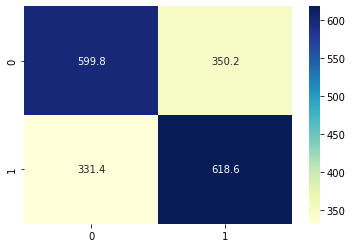

In [52]:
lra, lrf = Model_Tester(testX, testy, 1, 'lr')

{'test_tn': 483.8, 'test_fp': 466.2, 'test_fn': 198.2, 'test_tp': 751.8}
Accuracy: 0.6503157894736843
Precision: 0.6172917296755173
Recall: 0.7912566164464421
F1: 0.6934509225408527
Roc AUC Score: 0.7327031303469838


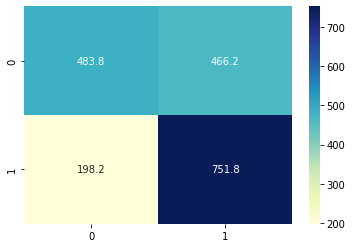

In [53]:
nba, nbf = Model_Tester(testX, testy, 1, 'NB')

{'test_tn': 702.6, 'test_fp': 247.4, 'test_fn': 158.4, 'test_tp': 791.6}
Accuracy: 0.7856842105263159
Precision: 0.759805483928489
Recall: 0.8355791076463129
F1: 0.795370374867616
Roc AUC Score: 0.784934504248326


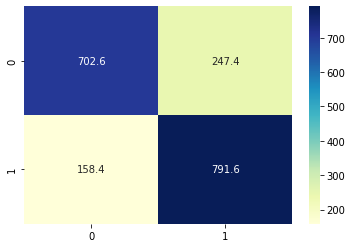

In [54]:
dta, dtf = Model_Tester(testX, testy, 1, 'dt') 

{'test_tn': 638.8, 'test_fp': 311.2, 'test_fn': 158.6, 'test_tp': 791.4}
Accuracy: 0.7527368421052631
Precision: 0.7178098566760677
Recall: 0.8330274267466141
F1: 0.7710840494579847
Roc AUC Score: 0.8189214712776176


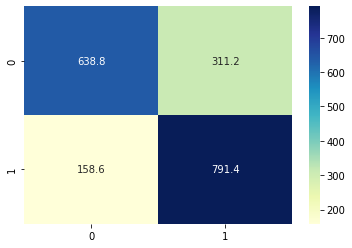

In [55]:
knna, knnf = Model_Tester(testX, testy, 1, 'knn')

{'test_tn': 835.8, 'test_fp': 114.2, 'test_fn': 186.4, 'test_tp': 763.6}
Accuracy: 0.842736842105263
Precision: 0.8695848315368556
Recall: 0.8045571411702381
F1: 0.8369357555252405
Roc AUC Score: 0.8931531012702809


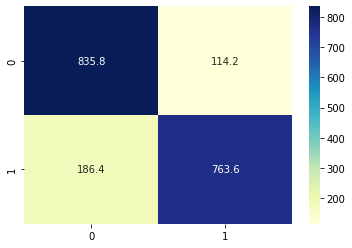

In [56]:
rfa, rff = Model_Tester(testX, testy, 1, 'rf') 

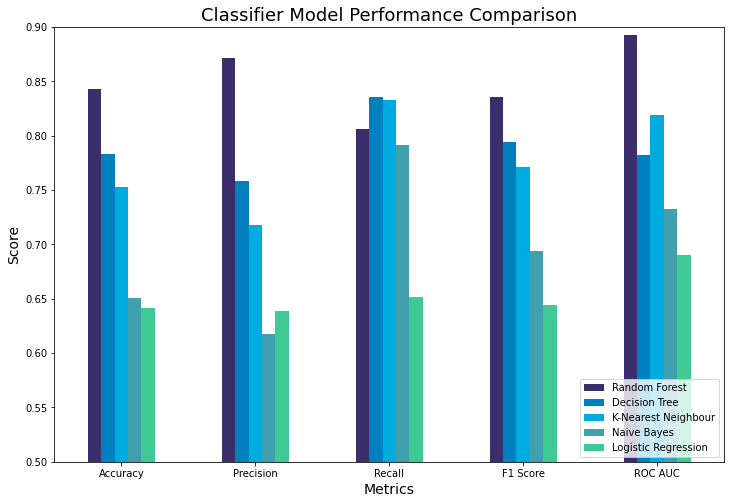

In [57]:
model_comp1 = [['Accuracy', 0.8430526315789473, 0.7833684210526315, 0.7527368421052631, 0.6503157894736843, 0.6412631578947369],
               ['Precision', 0.8712824761675078, 0.7578786109999134, 0.717809856676067, 0.6172917296755173, 0.6384079157697671],
               ['Recall', 0.8060212171750528, 0.8353613614376417, 0.8330274267466141, 0.7912566164464421, 0.6511237519620913],
               ['F1 Score', 0.8352636051073036, 0.794375715830918, 0.7710840494579847, 0.6934509225408527, 0.6445680304200692],
               ['ROC AUC Score', 0.8929666387718489, 0.7822572272347685, 0.8189214712776176, 0.7327031303469838, 0.6899686530782339]]

model_comp_df = pd.DataFrame(model_comp1)
model_comp_df.columns = ['Score', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbour', 'Naive Bayes', 'Logistic Regression']

ax = model_comp_df.plot.bar(ylim=(0.5,0.9), figsize=(12,8), color=['#3a2f6b', '#0080bf', '#00acdf', '#41a0ae', '#3ec995'])
plt.title('Classifier Model Performance Comparison', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], rotation=360)
plt.ylabel('Score', fontsize=14)
plt.legend(loc='lower right')

## Random Forest Model 
Class 0 - Normal 
Class 1 - Abnormal 

Test on just the real data 


In [58]:
def random_forest(X_train, y_train):

  #models and cross val
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
  model = RandomForestClassifier(random_state=1, class_weight='balanced')

  #fit model 
  trained_model = model.fit(X_train, y_train)

  #Confusion_Matrix_Scorer
  def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}

  #Evaluate Model
  scoring = {'acc':'accuracy', 'pre':'precision', 'recall':'recall', 'F1':'f1', 'RA':'roc_auc'}
  scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=1)
  CM = cross_validate(model, X_train, y_train, scoring=confusion_matrix_scorer, cv=cv, n_jobs=1)

  #Heatmap
  df = pd.DataFrame.from_dict(CM)
  df = df.drop(['fit_time', 'score_time'], axis=1)
  dic = {}
  for col in df:
    dic[col] = df[col].mean()
  array = np.array(list(dic.values()))
  narray = array.reshape(2, 2)
  sns.heatmap(narray, annot=True, cmap='YlGnBu', fmt='g')

  #Printing Results 
  print('Accuracy: {}'.format(mean(scores['test_acc'])))
  print('Precision: {}'.format(mean(scores['test_pre'])))
  print('Recall: {}'.format(mean(scores['test_recall'])))
  print('F1: {}'.format(mean(scores['test_F1'])))
  print('Roc AUC Score: {}'.format(mean(scores['test_RA'])))

  return trained_model

In [59]:
def shap_values(X_test, model):
  #SHAP values (Feature importance)
  shap.initjs()
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X_test)
  shap_obj0 = explainer(X_test)

  shap_obj = copy.deepcopy(shap_obj0)
  shap_obj.values = shap_obj.values[:,:,1]
  shap_obj.base_values = shap_obj.base_values[:,1]
  return shap_obj, shap_values 

In [60]:
X_train = over_data.copy()
y_train = X_train.pop('Final_Banding')

X_test = all_test.copy()
y_test = X_test.pop('Final_Banding')

Xf_train = over_female.copy()
yf_train = Xf_train.pop('Final_Banding')

Xf_test = female_test.copy()
yf_test = Xf_test.pop('Final_Banding')

Xm_train = over_male.copy()
ym_train = Xm_train.pop('Final_Banding')

Xm_test = male_test.copy()
ym_test = Xm_test.pop('Final_Banding')

Accuracy: 0.843859649122807
Precision: 0.8719015718364095
Recall: 0.8062381323467857
F1: 0.8377014037191531
Roc AUC Score: 0.8951046577618538


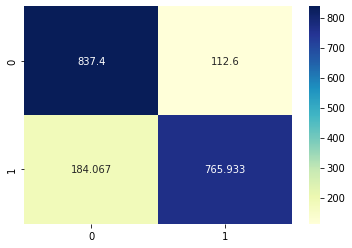

In [61]:
rf_fit_model = random_forest(X_train, y_train)

In [62]:
All_shapobj, All_shapvalues = shap_values(X_test, rf_fit_model) #10 Minutes

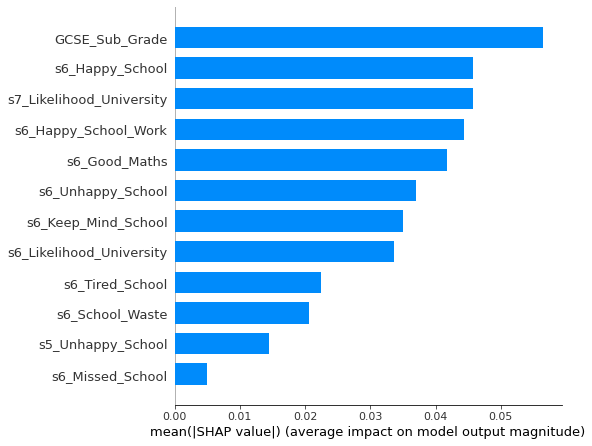

In [63]:
shap.summary_plot(All_shapobj, plot_type='bar')

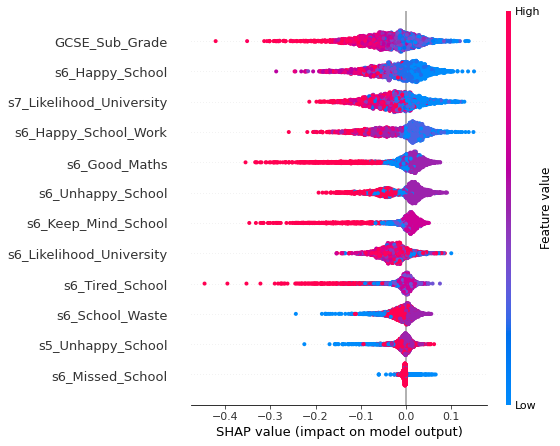

In [64]:
shap.summary_plot(All_shapobj)

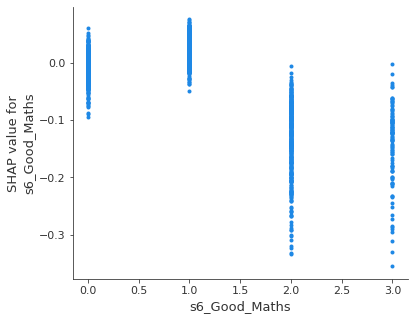

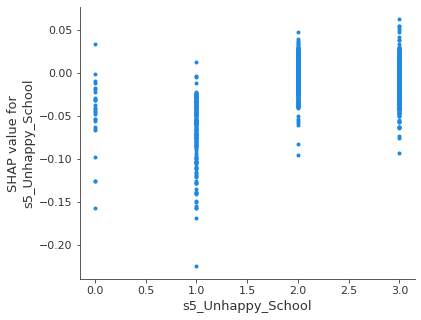

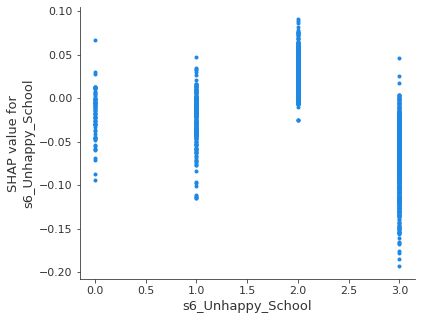

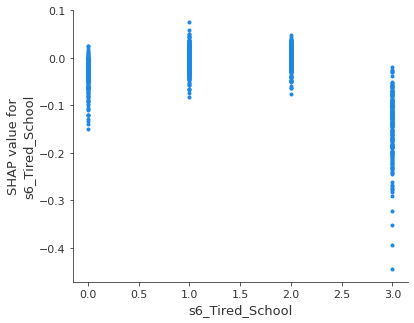

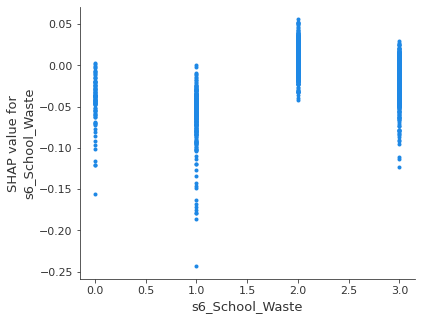

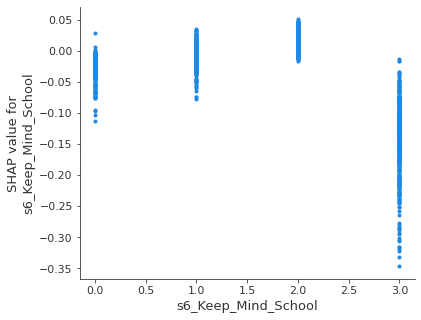

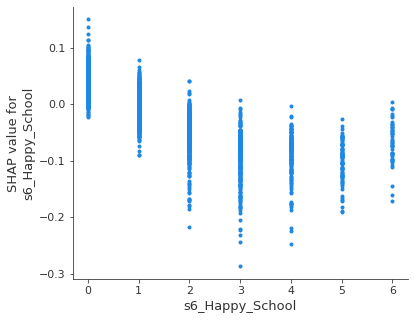

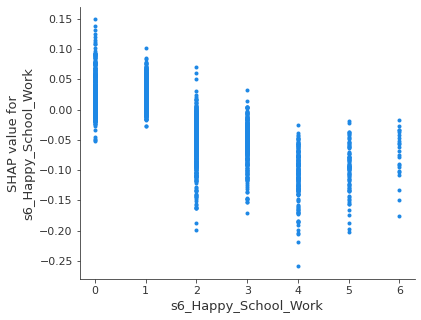

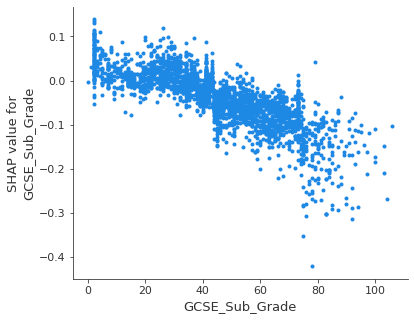

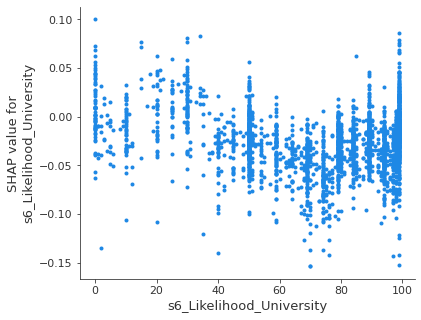

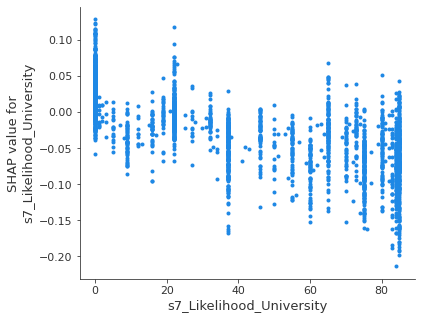

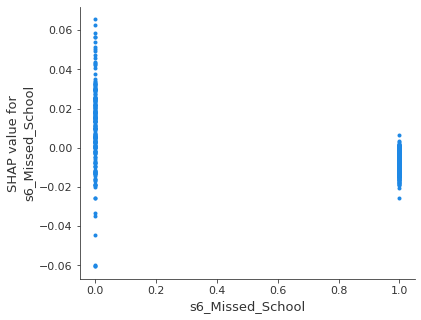

In [65]:
for colname in X_test:
  shap.dependence_plot(colname, All_shapvalues[1], X_test, interaction_index=None)

Accuracy: 0.8748513788717587
Precision: 0.9135507974856513
Recall: 0.8281816950153594
F1: 0.8686776098031277
Roc AUC Score: 0.9356549181020974


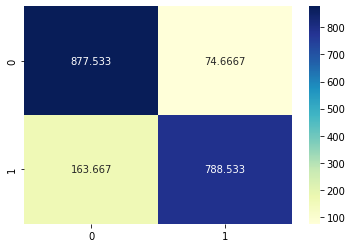

In [66]:
rf_fit_model_female = random_forest(Xf_train, yf_train)

In [ ]:
Female_shapobj, Female_shapvalues = shap_values(Xf_test, rf_fit_model_female) #10 Minutes

In [ ]:
shap.summary_plot(Female_shapobj, plot_type='bar')

In [ ]:
shap.summary_plot(Female_shapobj)

In [ ]:
for colname in Xf_test:
  shap.dependence_plot(colname, Female_shapvalues[1], Xf_test, interaction_index=None)

In [ ]:
rf_fit_model_male = random_forest(Xm_train, ym_train)

In [ ]:
Male_shapobj, Male_shapvalues = shap_values(Xm_test, rf_fit_model_male)

In [ ]:
shap.summary_plot(Male_shapobj, plot_type='bar')

In [ ]:
shap.summary_plot(Male_shapobj)

In [ ]:
for colname in Xm_test:
  shap.dependence_plot(colname, Male_shapvalues[1], Xm_test, interaction_index=None)